In [6]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import glob
#setting figure parameters 
plt.rcParams['figure.figsize']=[12,9]

In [7]:
data_folder = "/Users/mmessere/Desktop/lsa-ast361/Work/mmessere/lab7/radio-astronomy/" #where the files are saved
gal_files = glob.glob(data_folder+"galaxyData/galpos*0.dat") #selecting 10 galaxy position data files
cal_files = glob.glob(data_folder+"galaxyData/calib*") #selecting 1 calibration data file
gal_files.sort() #sorting files
cal_files.sort()

### Reading in 10 Galaxy Spectral Frames 

In [8]:
gal_spectra = []

for gal_file in gal_files:
        with open(gal_file) as gal_data:
            spectrum_rows = []
            for j, row in enumerate(gal_data, start=1):
                if j%4 ==0:
                    spectrum_rows.append(row)
            tot_spectrum = np.zeros(1024)
            for row in spectrum_rows:
                temp_spec = row.split(' ')
                spec = []
                for val in temp_spec:
                    if val != '' and val != '\n':
                        spec.append(val)
                tot_spectrum = (tot_spectrum + np.float64(spec))/len(spectrum_rows)
            gal_spectra.append(tot_spectrum)

### Reading in 1 Calibration Frame 

In [9]:
cal_spectra = []

for cal_file in cal_files:
    with open(cal_file) as cal_data:
        spectrum_rows2 = []
        for j, row2 in enumerate(cal_data, start=1):
            if j%4 ==0:
                spectrum_rows2.append(row)
        tot_spectrum2 = np.zeros(1024)
        for row2 in spectrum_rows2:
            temp_spec2 = row2.split(' ')
            spec2 = []
            for val2 in temp_spec2:
                if val2 != '' and val2 != '\n':
                    spec2.append(val2)
            tot_spectrum2 = (tot_spectrum2 + np.float64(spec2))/len(spectrum_rows2)
        cal_spectra.append(tot_spectrum)

### Plotting Radio Telescope Data

In [10]:
frequency = np.linspace(1416,1426,1024) #the frequency range in MHz 

Text(0.5, 1.0, 'Relative Flux for Each Galaxy Longitudinal Pointing vs. Frequency')

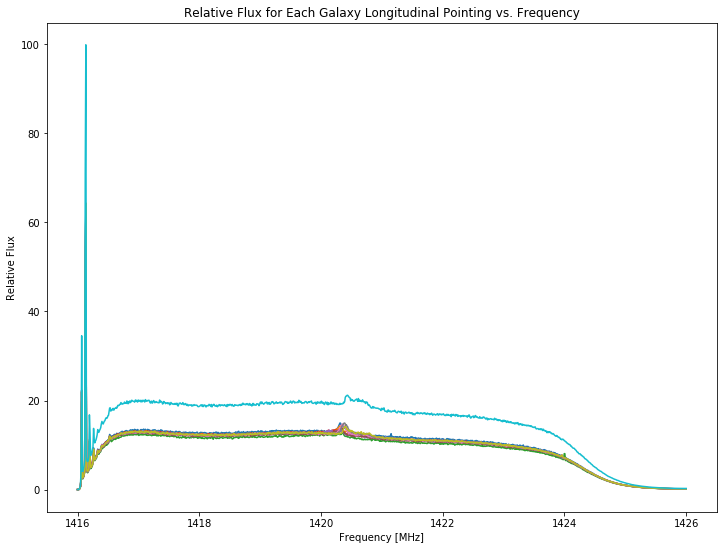

In [11]:
for i in range(0,len(gal_spectra)): #for loop used to plot the 10 galaxy spectral frames 
    plt.plot(frequency,gal_spectra[i])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("Relative Flux for Each Galaxy Longitudinal Pointing vs. Frequency")

Text(0.5, 1.0, 'Calibration Flux vs. Frequency')

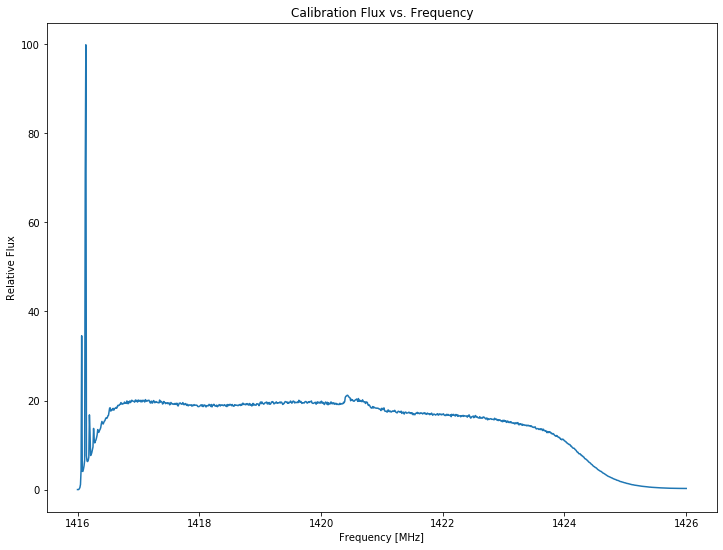

In [12]:
for i in range(0,len(cal_spectra)): #for loop for the single calibration frame flux data 
    plt.plot(frequency,cal_spectra[i])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("Calibration Flux vs. Frequency")

Text(0.5, 1.0, 'Galaxy and Calibration Relative Flux vs. Frequency')

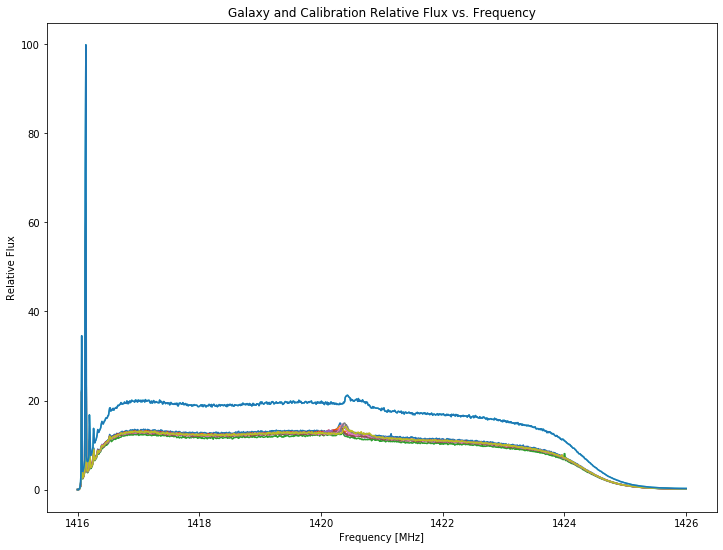

In [13]:
for i in range(0,len(gal_spectra)): #for loop to plot galaxy flux data in addition to calibration frame 
    plt.plot(frequency,gal_spectra[i])
plt.plot(frequency,cal_spectra[0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("Galaxy and Calibration Relative Flux vs. Frequency")

Text(0.5, 1.0, 'Galaxy Relative Flux vs. Frequency')

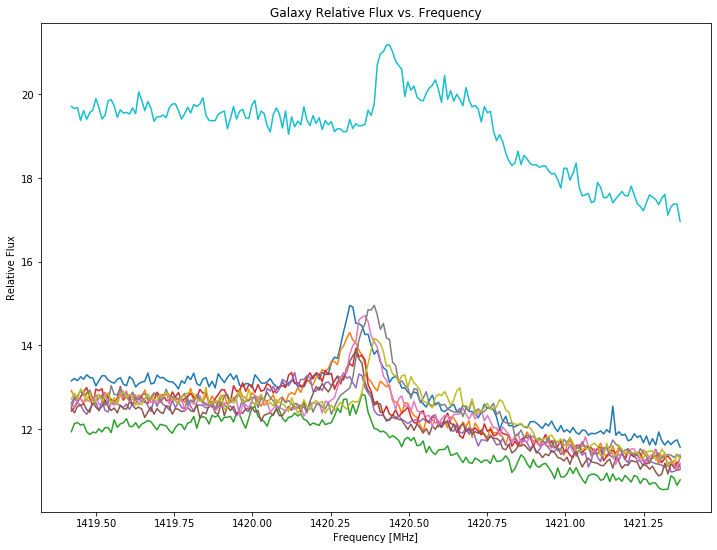

In [14]:
for i in range(0,len(gal_spectra)):
    plt.plot(frequency[350:550],gal_spectra[i][350:550])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("Galaxy Relative Flux vs. Frequency")

14.673054377717456


Text(0.5, 1.0, 'Galaxy Calibrated Relative Flux vs. Frequency')

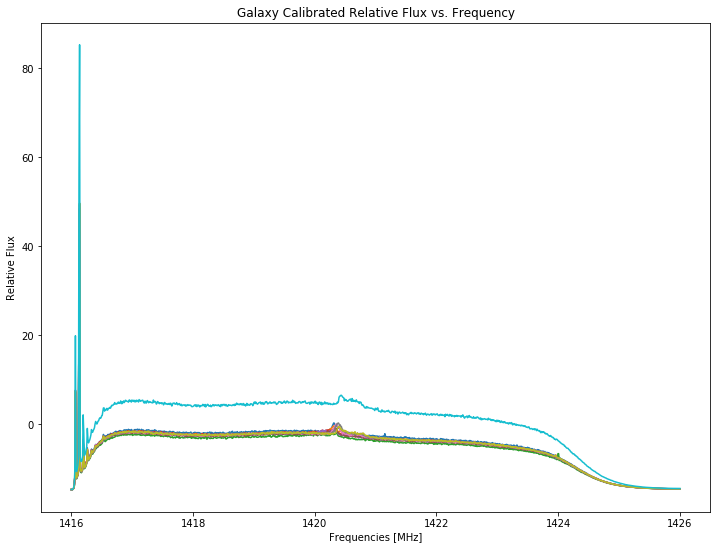

In [15]:
calmean = np.mean(cal_spectra)#taking the mean over all frequencies of the calibration frame
print(calmean)
calgalspectra = gal_spectra - calmean #subtracting the averaged calibration flux values from the galaxy spectral data
for i in range(0,len(gal_spectra)): #for loop used to plot updated relative flux vs. frequency 
    plt.plot(frequency,calgalspectra[i])
plt.xlabel("Frequencies [MHz]")
plt.ylabel("Relative Flux")
plt.title("Galaxy Calibrated Relative Flux vs. Frequency")

### Determining Maximum Velocity Frequency Values 

In [16]:
HI_line = 1420.405752 

In [17]:
lower = 102*2 #lower bound pixel value
upper = 1024 - (3*102) #upper bound pixel value

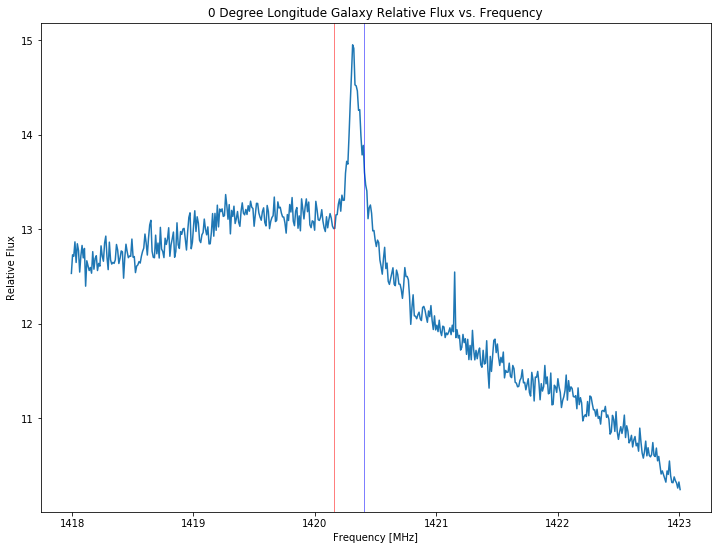

In [18]:
plt.plot(frequency[lower:upper],gal_spectra[0][lower:upper])

long0 = 1420.160
plt.axvline(long0,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("0 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

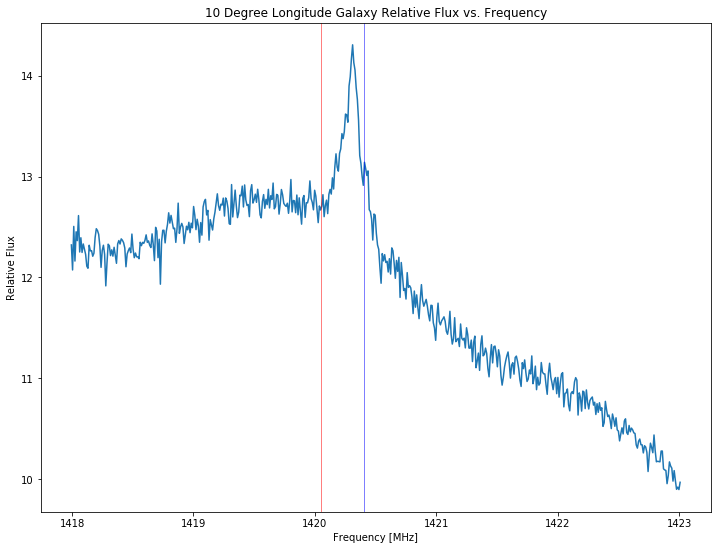

In [19]:
plt.plot(frequency[lower:upper],gal_spectra[1][lower:upper])

long10 = 1420.05
plt.axvline(long10,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("10 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

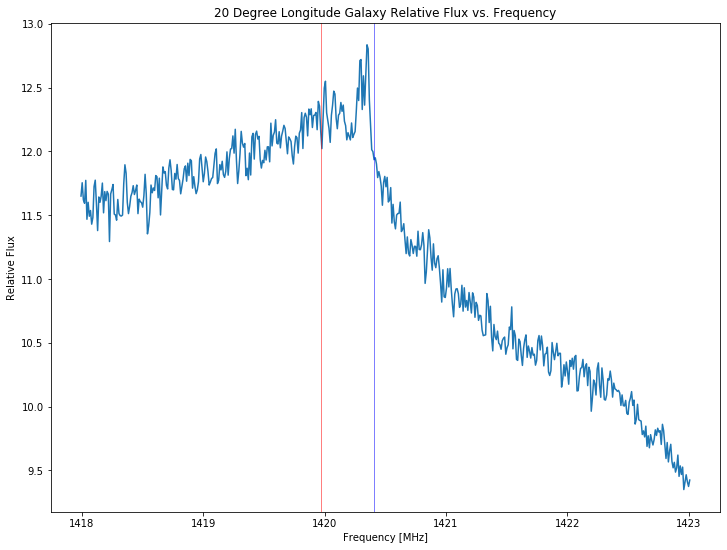

In [20]:
plt.plot(frequency[lower:upper],gal_spectra[2][lower:upper])

long20 = 1419.97
plt.axvline(long20,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("20 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

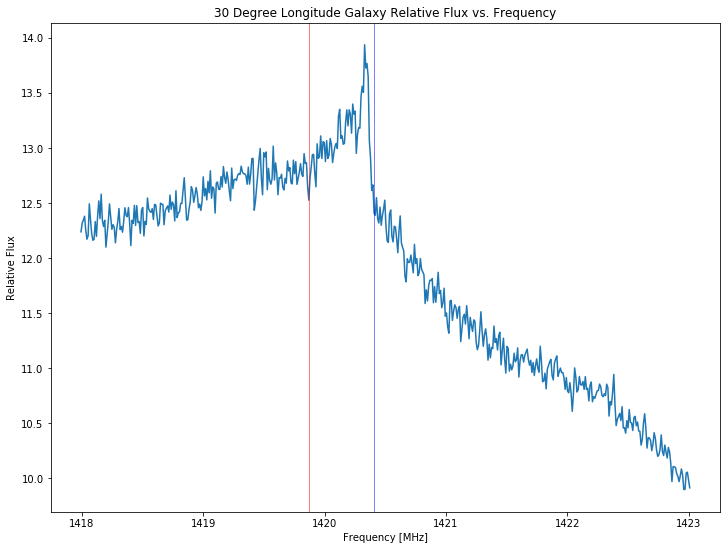

In [21]:
plt.plot(frequency[lower:upper],gal_spectra[3][lower:upper])

long30 = 1419.87
plt.axvline(long30,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("30 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI 

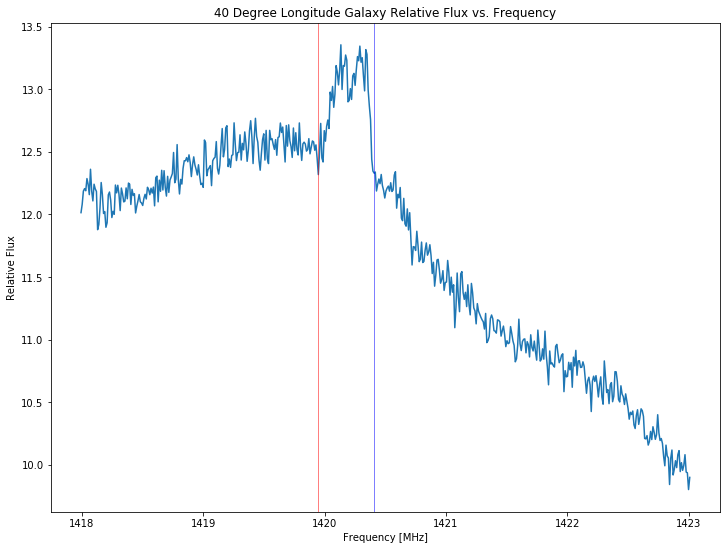

In [22]:
plt.plot(frequency[lower:upper],gal_spectra[4][lower:upper])

long40 = 1419.95
plt.axvline(long40,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("40 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

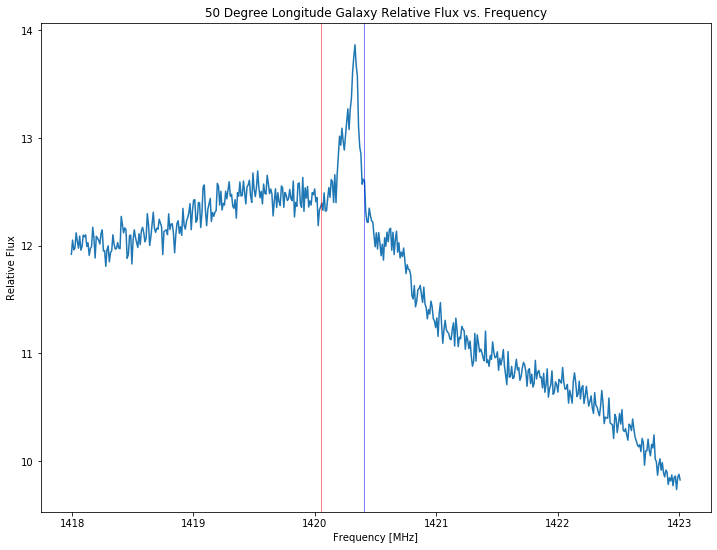

In [23]:
plt.plot(frequency[lower:upper],gal_spectra[5][lower:upper])

long50 = 1420.05
plt.axvline(long50,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("50 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

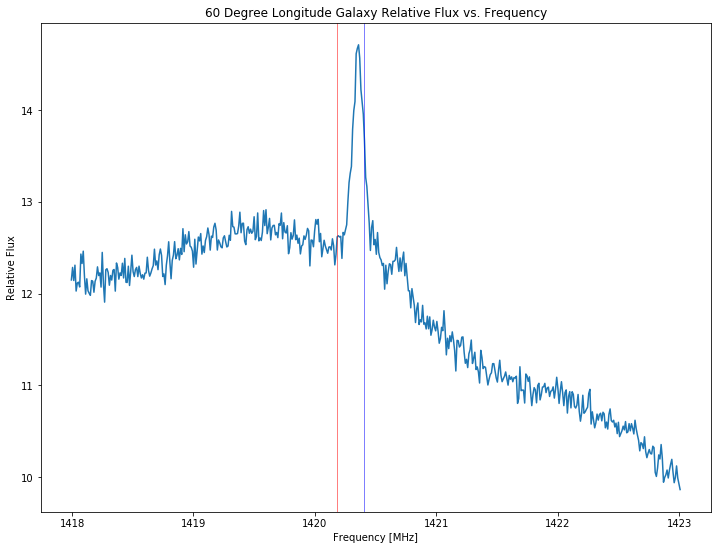

In [24]:
plt.plot(frequency[lower:upper],gal_spectra[6][lower:upper])

long60 = 1420.18
plt.axvline(long60,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("60 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

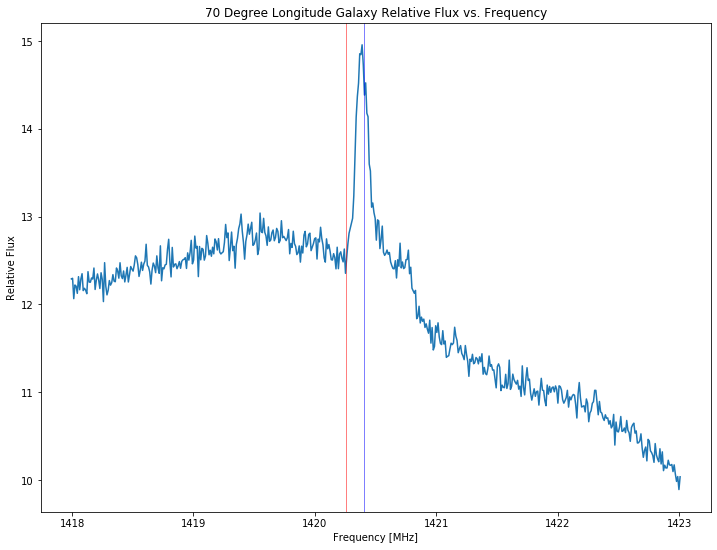

In [25]:
plt.plot(frequency[lower:upper],gal_spectra[7][lower:upper])

long70 = 1420.255
plt.axvline(long70,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("70 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

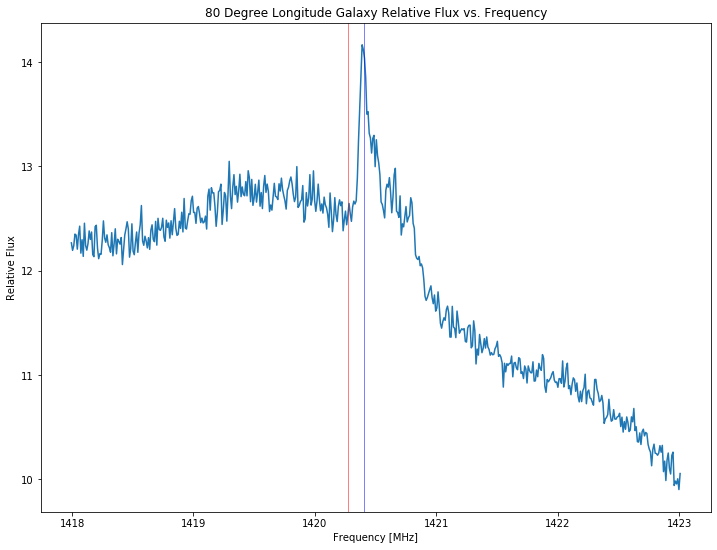

In [43]:
plt.plot(frequency[lower:upper],gal_spectra[8][lower:upper])

long80 = 1420.27
plt.axvline(long80,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")

plt.title("80 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

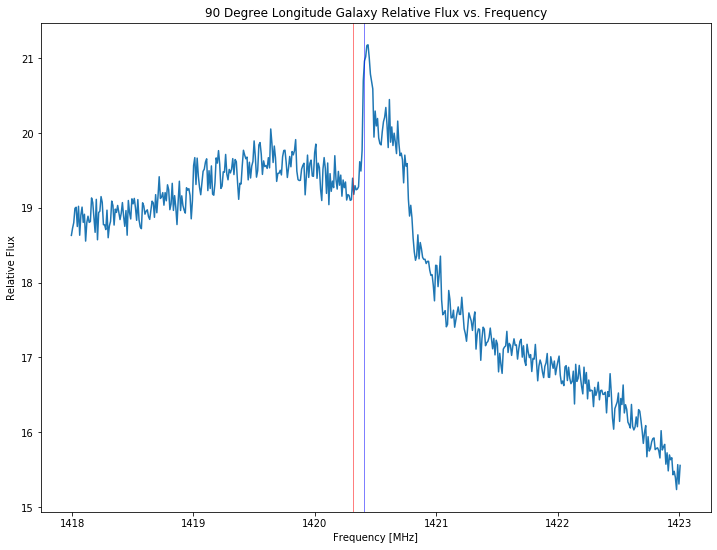

In [44]:
plt.plot(frequency[lower:upper],gal_spectra[9][lower:upper])

long90 = 1420.31
plt.axvline(long90,color='r', lw = .5)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Relative Flux")
plt.title("90 Degree Longitude Galaxy Relative Flux vs. Frequency")

plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

### Replotting the Frequencies with Subplots

In [45]:
#fig = plt.figure(figsize=(24,8),frameon=False)

#ax1 = plt.subplot(1,1,1)
#ax1.plot(frequency[lower:upper],gal_spectra[0][lower:upper])
#h100 = 1420.160
#ax1.axvline(h100,color='r', lw = .5)
#ax1.set_xlabel("Frequency [MHz]")
#ax1.set_ylabel("Relative Flux")
#ax1.set_title("0 Degree Longitude Galaxy Relative Flux vs. Frequency")

#plt.axvline(HI_line,color='b', lw = .5) #plotting the stationary frequency of HI

#ax2 = plt.subplot(2,5,2)
#ax3 = plt.subplot(2,5,3)
#ax4 = plt.subplot(2,5,4)
#ax5 = plt.subplot(2,5,5)
#ax6 = plt.subplot(2,5,6)
#ax7 = plt.subplot(2,5,7)
#ax8 = plt.subplot(2,5,8)
#ax9 = plt.subplot(2,5,9)
#ax10 = plt.subplot(2,5,10)


### Calculating Velocities

In [46]:
HI_redshift = np.array([long0,long10,long20,long30,long40,long50,long60,long70,long80,long90]) #list of max outward velocity HI frequencies 
vel = np.zeros(len(HI_redshift)) #empty list to store velocities 
c = 299792.458 #speed of light
for i in range(len(HI_redshift)): 
    vel[i] = c*(1-(HI_redshift[i]/HI_line)) #using doppler shift equation to solve for velocity

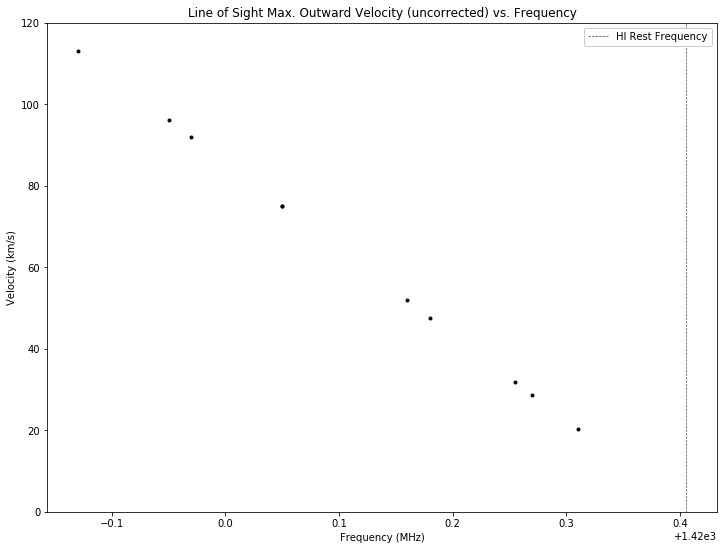

In [47]:
plt.plot(HI_redshift,vel, 'k.') #plotting calculated velocities as a function of frequency
plt.ylim(0,120)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Velocity (km/s)")
plt.title("Line of Sight Max. Outward Velocity (uncorrected) vs. Frequency")

plt.axvline(HI_line, color = 'k', lw = .5, dashes = (5,2,5,2), label = 'HI Rest Frequency')
plt.legend(loc = 1, framealpha = 1)


### Calculating Galactic Radius 

Text(0.5, 1.0, 'Line of Sight Max. Outward Velocity (uncorrected) vs. Radii')

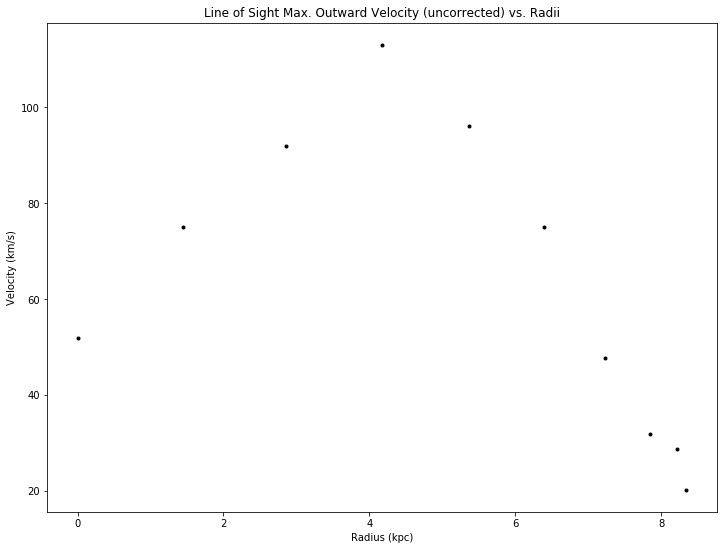

In [48]:
longitude = np.array([0,10,20,30,40,50,60,70,80,90]) #array of all longitude values (degrees)

radian = np.zeros(len(longitude)) 
radius = np.zeros(len(longitude))
r0 = 8.34 #radius of the galaxy to the Sun (kpc)
for i in range(len(longitude)):
    radian[i] = longitude[i]*np.pi/180 #converting deg. to rad.
    radius[i] = r0*np.sin(radian[i]) #calculating the position from the galactic center for each telescope pointing 
    
plt.plot(radius,vel, 'k.')
plt.xlabel("Radius (kpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Line of Sight Max. Outward Velocity (uncorrected) vs. Radii")

Text(0.5, 1.0, 'Adjusted VSLR Velocity vs. Radius')

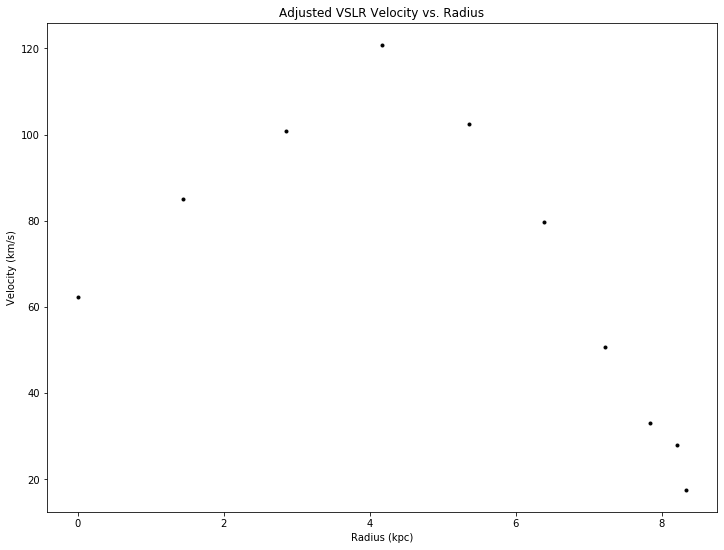

In [49]:
vslr = np.array([10.48,9.86,8.96,7.77,6.33,4.70,2.93,1.07,-0.82,-2.68]) #velocity adjustments found in the file headers

vslr_adjustedVel = vel + vslr #adjusting calculated velocities with corresponding vslr values
plt.plot(radius,vslr_adjustedVel, 'k.')
plt.xlabel("Radius (kpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Adjusted VSLR Velocity vs. Radius")

### Correction for the Sun's Orbital Velocity 

In [50]:
vSun = 255.2 #orbital speed of the Sun
err = 5.1 #error of the orbital speed of the Sun (plus or minus 5.1 km/s)
vmax = np.zeros(len(radian)) #empty list of max outward velocities
errs = np.zeros(len(radian)) #empty list for errors
for i in range(len(radian)): #for loop to calculate the max velocities and errors for each longitude pointing
    vmax[i] = vSun*np.sin(radian[i]) #calculation for velocity adjustment due to the Sun
    errs[i] = err*np.sin(radian[i]) #error for the Sun's velocity 

### Milky Way Galaxy Rotational Curve 

Text(0.5, 1.0, 'Milky Way Galaxy Rotational Curve (corrected)')

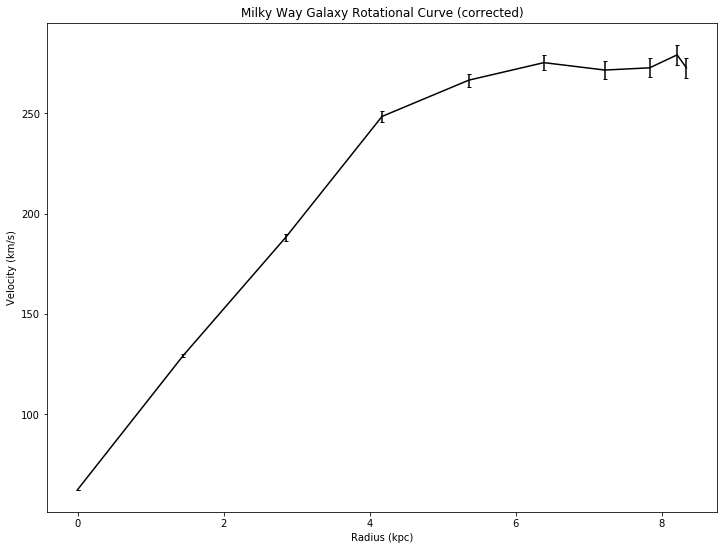

In [51]:
corrected_vel = vslr_adjustedVel + vmax #adding the solar velocity adjustments to the previous VSLR adjustments

plt.errorbar(radius,corrected_vel,errs, c= 'k', ecolor = 'k', capsize = 2) #plotting with calculated error bars
plt.xlabel("Radius (kpc)")
plt.ylabel("Velocity (km/s)")
plt.title("Milky Way Galaxy Rotational Curve (corrected)")

In [52]:
print(np.max(corrected_vel))

279.15491051482985
